### Visualization techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### working with univariant data 

### 1. categorical data

### **a. frequency distribution table**

In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### **b. Bar Chart**

<Axes: xlabel='Pclass'>

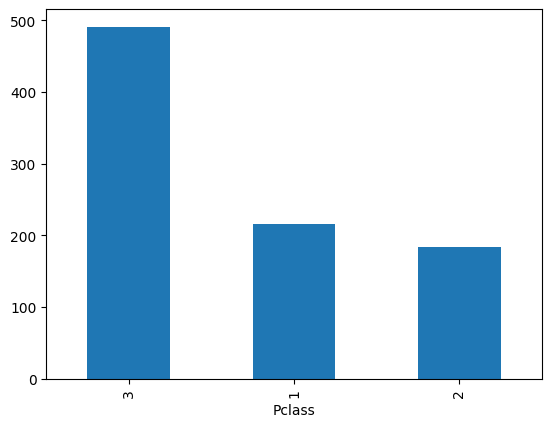

In [15]:
data['Pclass'].value_counts().plot(kind='bar')

### **c. Pie Chart**

<Axes: ylabel='count'>

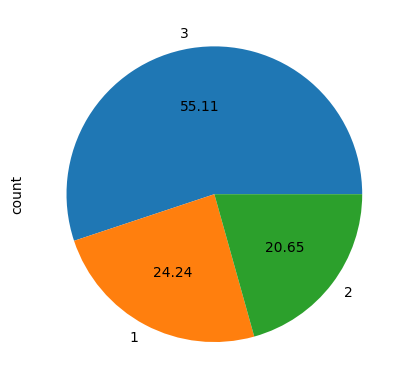

In [16]:
data['Pclass'].value_counts().plot(kind='pie', autopct='%0.2f')

### **d.cumulative frequency**

In [25]:
a = data['Pclass'].value_counts()

In [26]:
b=((a / a.sum()) * 100).values

In [27]:
b

array([55.10662177, 24.24242424, 20.65095398])

In [ ]:
c = []

[]

In [44]:
cf = 0

In [45]:
for i in b:
    cf = cf + i
    c.append(cf)
c


[np.float64(55.106621773288445),
 np.float64(79.34904601571269),
 np.float64(100.0)]

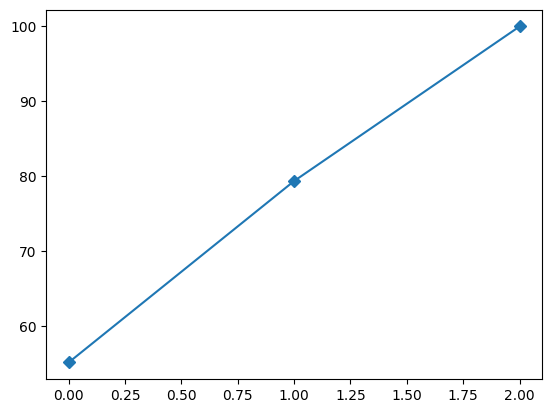

In [47]:
plt.plot(c, marker='D')

### 2. Numerical Data

### **a. histogram**

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

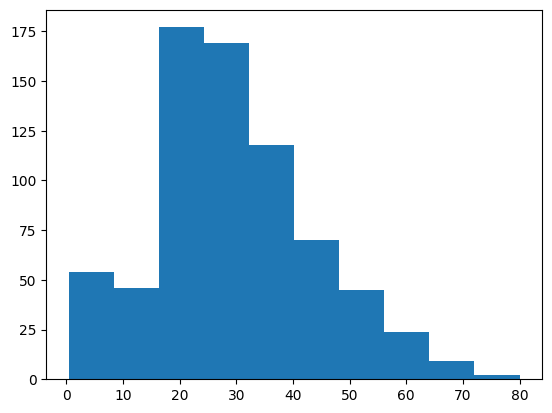

In [56]:
plt.hist(x=data['Age'])

### **b. Boxplots**

<Axes: xlabel='Age'>

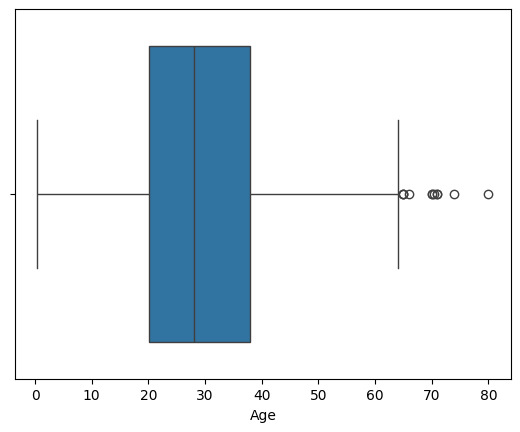

In [73]:
sns.boxplot(data = data['Age'], orient='h')

In [81]:
a = data.dropna(subset=['Age'])
a = a['Age'].values
np.median(a)

np.float64(28.0)

### **c. kdeplot**

<Axes: xlabel='Age', ylabel='Density'>

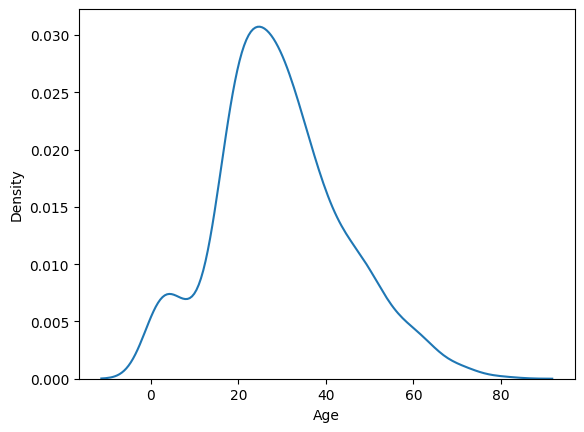

In [83]:
sns.kdeplot(data=data['Age'])

### Working with Bivariant

### **1. Categorical vs Numerical**

#### **a. Box Plot**

<Axes: xlabel='Pclass', ylabel='Age'>

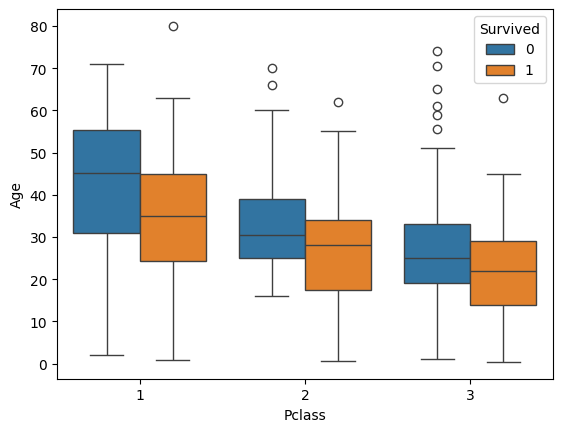

In [86]:
sns.boxplot(data=data, x='Pclass', y='Age', hue='Survived')

#### **b. Bar Plot**

<Axes: xlabel='Survived', ylabel='Age'>

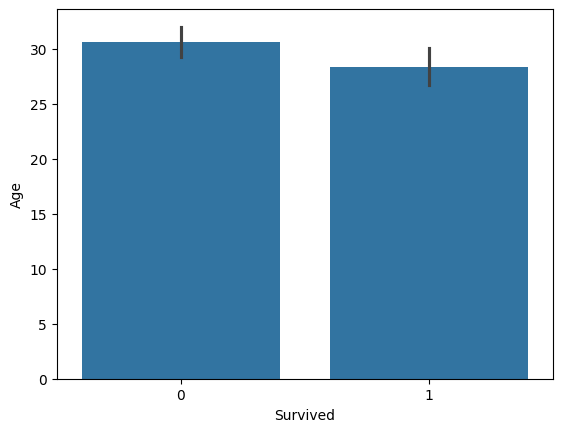

In [92]:
sns.barplot(data=data, x='Survived', y='Age')

### **2. Numerical vs Numerical**

#### **a. Scatter Plot**

<Axes: xlabel='Age', ylabel='Fare'>

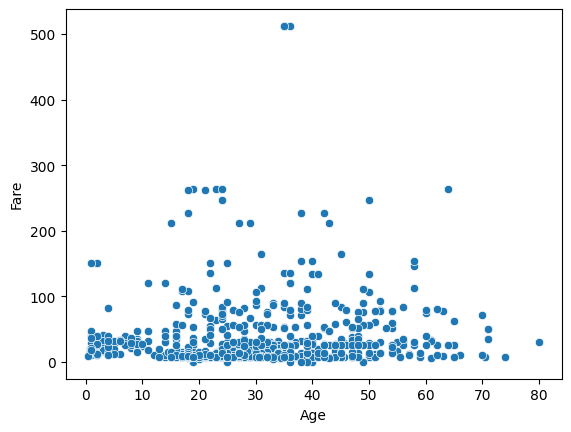

In [95]:
sns.scatterplot(data=data, x='Age', y='Fare')

### **3. Categorical vs Categorical**

#### **a. cross tables/ contingency table** -> pivot table

displays the frequency distribution of two or more categorical variables.

In [6]:
ct = pd.crosstab(data['Pclass'], data['Sex'])

In [5]:
data.pivot_table(index='Pclass', columns='Sex', aggfunc='count')

Age       Cabin      Embarked        Fare        Name       Parch  \
Sex    female male female male   female male female male female male female   
Pclass                                                                        
1          85  101     81   95       92  122     94  122     94  122     94   
2          74   99     10    6       76  108     76  108     76  108     76   
3         102  253      6    6      144  347    144  347    144  347    144   

            PassengerId       SibSp      Survived      Ticket       
Sex    male      female male female male   female male female male  
Pclass                                                              
1       122          94  122     94  122       94  122     94  122  
2       108          76  108     76  108       76  108     76  108  
3       347         144  347    144  347      144  347    144  347

<Axes: xlabel='Pclass'>

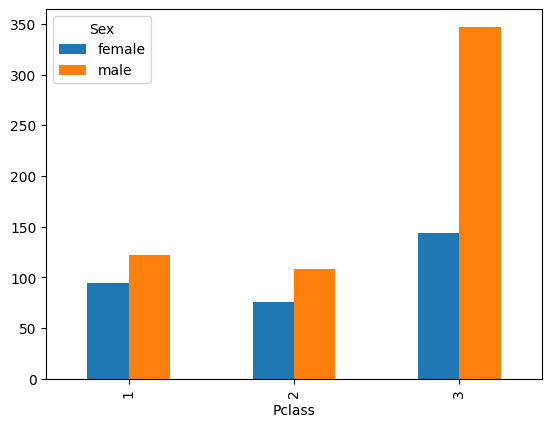

In [7]:
ct.plot(kind='bar')

<Axes: xlabel='Sex', ylabel='Pclass'>

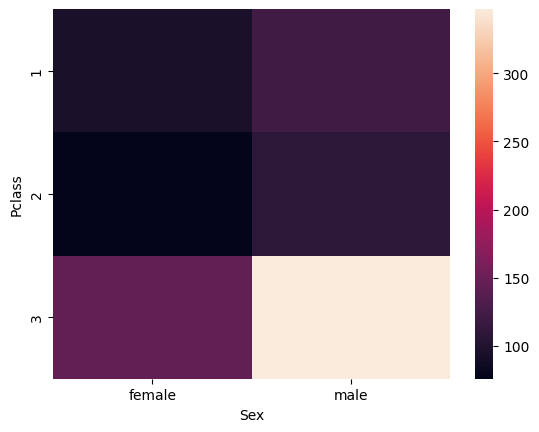

In [8]:
sns.heatmap(ct)